# MDLM

### CONFIG

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd

import sys, pathlib, os
project_root = pathlib.Path.home() / "projets" / "protein-generation"
sys.path.append(str(project_root))

from scripts.models.mdlm_VL_M_utils import *
from scripts.utils import *

In [2]:
# %% Main experiment workflow
print("=== STARTING EXPERIMENT ===")
config = load_experiment_config("/home/arthur/projets/protein-generation/configs/base_config.yaml")
config = setup_experiment_directory(config)

print(f"Experiment name: {config['experiment']['name']}")
print(f"Experiment directory: {config['exp_dir']}")

# Immediately save the configuration
save_experiment_config(config, config['exp_dir'])

=== STARTING EXPERIMENT ===
Experiment name: exp_classic_mdlm_VL__20250722_103305
Experiment directory: /home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305


'/home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305/config.yaml'

In [3]:


# Device and data setup
device = device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.manual_seed(config['training']['seed'])
np.random.seed(config['training']['seed'])

protein_data = pd.read_csv(config['data']['input_file'])
sequences = protein_data['sequence'].tolist()
sequences = [seq for seq in sequences if len(seq)<config['model']['max_seq_length']]
sequences = sequences[:config['training']['n_samples']]
print(f'{len(sequences)} séquences')
print(set([len(seq) for seq in sequences]))


# Model creation
vocabulary = ProteinVocabularyMaskPad()
encoded = vocabulary.encode_batch(sequences,config['model']['max_seq_length'])
dataset = torch.utils.data.TensorDataset(encoded)
dataloader = torch.utils.data.DataLoader(dataset,
                                         batch_size=config['training']['batch_size'], 
                                         shuffle=True)

model = DenoisingTransformer(
    vocab=vocabulary,
    max_seq_length=config['model']['max_seq_length'],
    d_model=config['model']['d_model'],
    n_heads=config['model']['n_heads'],
    n_layers=config['model']['n_layers'],
    dropout=config['model']['dropout']
    ).to(device)

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=config['training']['learning_rate'])
    
# Noise schedule function
noise_schedule = NoiseSchedule(config['diffusion']['noise_schedule'])
    

1000 séquences
{40, 42, 45, 46, 48, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 145, 146, 147, 149, 150, 151, 152, 153, 154, 155, 156, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 182, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 

### PIPELINE


=== TRAINING ===


Training:   0%|          | 1/500 [00:03<32:54,  3.96s/it]

Epoch 0: Loss = 2.9453


Training:   2%|▏         | 11/500 [00:39<29:10,  3.58s/it]

Epoch 10: Loss = 2.7941


Training:   4%|▍         | 21/500 [01:15<28:35,  3.58s/it]

Epoch 20: Loss = 2.7423


Training:   6%|▌         | 31/500 [01:51<28:02,  3.59s/it]

Epoch 30: Loss = 2.6172


Training:   8%|▊         | 41/500 [02:26<27:20,  3.57s/it]

Epoch 40: Loss = 2.4727


Training:  10%|█         | 51/500 [03:02<26:41,  3.57s/it]

Epoch 50: Loss = 2.3261


Training:  12%|█▏        | 61/500 [03:38<26:02,  3.56s/it]

Epoch 60: Loss = 2.2299


Training:  14%|█▍        | 71/500 [04:13<25:26,  3.56s/it]

Epoch 70: Loss = 2.1924


Training:  16%|█▌        | 81/500 [04:49<24:50,  3.56s/it]

Epoch 80: Loss = 2.0476


Training:  18%|█▊        | 91/500 [05:24<24:13,  3.55s/it]

Epoch 90: Loss = 1.9789


Training:  20%|██        | 101/500 [06:00<23:40,  3.56s/it]

Epoch 100: Loss = 1.9589


Training:  22%|██▏       | 111/500 [06:35<23:00,  3.55s/it]

Epoch 110: Loss = 1.8874


Training:  24%|██▍       | 121/500 [07:11<22:25,  3.55s/it]

Epoch 120: Loss = 1.8085


Training:  26%|██▌       | 131/500 [07:46<21:49,  3.55s/it]

Epoch 130: Loss = 1.7965


Training:  28%|██▊       | 141/500 [08:22<21:15,  3.55s/it]

Epoch 140: Loss = 1.7568


Training:  30%|███       | 151/500 [08:57<20:38,  3.55s/it]

Epoch 150: Loss = 1.7711


Training:  32%|███▏      | 161/500 [09:33<20:04,  3.55s/it]

Epoch 160: Loss = 1.6989


Training:  34%|███▍      | 171/500 [10:08<19:25,  3.54s/it]

Epoch 170: Loss = 1.6078


Training:  36%|███▌      | 181/500 [10:44<18:50,  3.54s/it]

Epoch 180: Loss = 1.5835


Training:  38%|███▊      | 191/500 [11:19<18:14,  3.54s/it]

Epoch 190: Loss = 1.5187


Training:  40%|████      | 201/500 [11:55<17:41,  3.55s/it]

Epoch 200: Loss = 1.5082


Training:  42%|████▏     | 211/500 [12:30<17:06,  3.55s/it]

Epoch 210: Loss = 1.4881


Training:  44%|████▍     | 221/500 [13:06<16:30,  3.55s/it]

Epoch 220: Loss = 1.4887


Training:  46%|████▌     | 231/500 [13:41<15:54,  3.55s/it]

Epoch 230: Loss = 1.4088


Training:  48%|████▊     | 241/500 [14:17<15:19,  3.55s/it]

Epoch 240: Loss = 1.4122


Training:  50%|█████     | 251/500 [14:52<14:41,  3.54s/it]

Epoch 250: Loss = 1.2995


Training:  52%|█████▏    | 261/500 [15:28<14:06,  3.54s/it]

Epoch 260: Loss = 1.3255


Training:  54%|█████▍    | 271/500 [16:03<13:32,  3.55s/it]

Epoch 270: Loss = 1.2579


Training:  56%|█████▌    | 281/500 [16:39<12:56,  3.55s/it]

Epoch 280: Loss = 1.3434


Training:  58%|█████▊    | 291/500 [17:14<12:21,  3.55s/it]

Epoch 290: Loss = 1.2593


Training:  60%|██████    | 301/500 [17:49<11:45,  3.55s/it]

Epoch 300: Loss = 1.2409


Training:  62%|██████▏   | 311/500 [18:25<11:10,  3.55s/it]

Epoch 310: Loss = 1.2275


Training:  64%|██████▍   | 321/500 [19:00<10:34,  3.55s/it]

Epoch 320: Loss = 1.1005


Training:  66%|██████▌   | 331/500 [19:36<09:59,  3.55s/it]

Epoch 330: Loss = 1.1722


Training:  68%|██████▊   | 341/500 [20:11<09:24,  3.55s/it]

Epoch 340: Loss = 1.1473


Training:  70%|███████   | 351/500 [20:47<08:48,  3.55s/it]

Epoch 350: Loss = 1.0865


Training:  72%|███████▏  | 361/500 [21:22<08:12,  3.55s/it]

Epoch 360: Loss = 1.0505


Training:  74%|███████▍  | 371/500 [21:58<07:37,  3.55s/it]

Epoch 370: Loss = 0.9955


Training:  76%|███████▌  | 381/500 [22:33<07:02,  3.55s/it]

Epoch 380: Loss = 0.9683


Training:  78%|███████▊  | 391/500 [23:09<06:26,  3.55s/it]

Epoch 390: Loss = 1.0379


Training:  80%|████████  | 401/500 [23:44<05:51,  3.55s/it]

Epoch 400: Loss = 0.9938


Training:  82%|████████▏ | 411/500 [24:20<05:15,  3.55s/it]

Epoch 410: Loss = 0.9766


Training:  84%|████████▍ | 421/500 [24:55<04:40,  3.55s/it]

Epoch 420: Loss = 0.8753


Training:  86%|████████▌ | 431/500 [25:30<04:04,  3.54s/it]

Epoch 430: Loss = 0.8697


Training:  88%|████████▊ | 441/500 [26:06<03:29,  3.54s/it]

Epoch 440: Loss = 0.8249


Training:  90%|█████████ | 451/500 [26:41<02:54,  3.56s/it]

Epoch 450: Loss = 0.7755


Training:  92%|█████████▏| 461/500 [27:17<02:18,  3.55s/it]

Epoch 460: Loss = 0.8686


Training:  94%|█████████▍| 471/500 [27:52<01:42,  3.53s/it]

Epoch 470: Loss = 0.7583


Training:  96%|█████████▌| 481/500 [28:28<01:07,  3.55s/it]

Epoch 480: Loss = 0.7796


Training:  98%|█████████▊| 491/500 [29:03<00:31,  3.54s/it]

Epoch 490: Loss = 0.8599


Training: 100%|██████████| 500/500 [29:35<00:00,  3.55s/it]


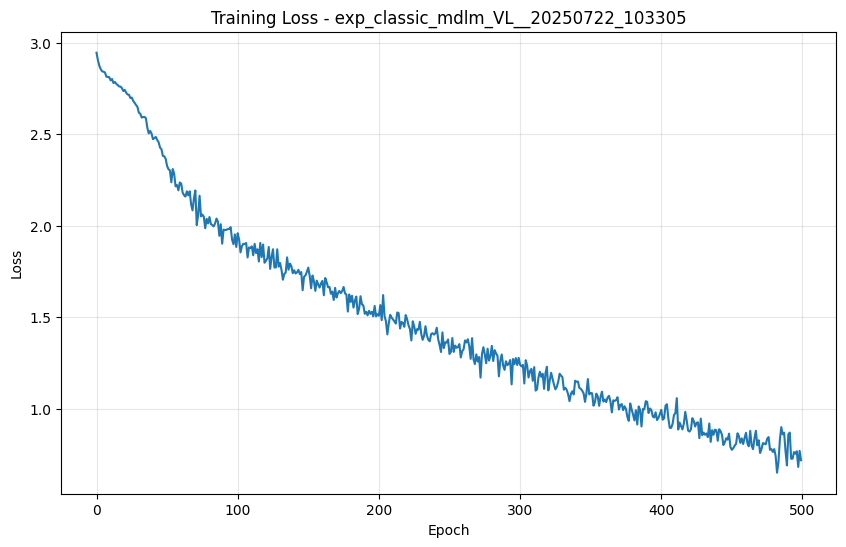

Plot saved: /home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305/training_loss.png


In [4]:
print("\n=== TRAINING ===")
losses = train_model(
    model=model,
    dataloader=dataloader,
    optimizer=optimizer,                                                                
    noise_schedule=noise_schedule,
    n_epochs=config['training']['n_epochs'],
    vocab=vocabulary
)

# Plot losses
plot_and_save_losses(config, losses)

In [5]:
# Sequence generation
print("\n=== GENERATION ===")
generated_tokens = generate_sequences(
    model=model,
    vocab=vocabulary,
    n_samples=config['generation']['n_samples'],
    seq_length=config['generation']['seq_length'],
    noise_schedule=noise_schedule,
    dt=config['generation']['dt']
)

# Decode sequences
generated_sequences = [vocabulary.decode_sequence(seq) for seq in generated_tokens]

# Display and save results
display_sample_sequences(config, generated_sequences)


=== GENERATION ===


/home/arthur/miniforge3/envs/mdlm_env/lib/python3.9/site-packages/torch/nn/modules/transformer.py:502: UserWarning: The PyTorch API of nested tensors is in prototype stage and will change in the near future. (Triggered internally at ../aten/src/ATen/NestedTensorImpl.cpp:178.)
  output = torch._nested_tensor_from_mask(



Displaying 5 generated sequences:
Sequence 1: MVDLNVQLRVNIRNDYILAIRNAVSSGVKEVANLGVSQKADIRYEHRFAV...
Sequence 2: MVSQLADIRSNNDCAVVLASQNARIEVVKYLVNLGAGDRAHNDYAVRMAS...
Sequence 3: MVKVLVVIGVNIRYDNKCAIQNASLHGHKEVVKYLVSQGANIFDENNFAV...
Sequence 4: MVSLLIWIRSNNVDAVDLASQNGRIEVVKYVVNLGANIRHLIDYEVKMWV...
Sequence 5: MVSLGAVIRSNNLCEVVLASQNAREEVVKYLVNYGSSVRASNERAVRMAD...


In [6]:

print("\n=== SAVING RESULTS ===")
save_results(config, model, losses, generated_sequences)

# Final summary
print(f"\n=== EXPERIMENT COMPLETE ===")
print(f"Name: {config['experiment']['name']}")
print(f"Directory: {config['exp_dir']}")
print(f"Training sequences: {len(sequences)}")
print(f"Epochs: {config['training']['n_epochs']}")
print(f"Final loss: {losses[-1]:.4f}")
print(f"Generated sequences: {len(generated_sequences)}")

print("\nSaved files:")
for fname in os.listdir(config['exp_dir']):
    print(f"  - {fname}")

print("\nExperiment finished successfully!")


=== SAVING RESULTS ===
Model saved: /home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305/model.pth
Losses saved: /home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305/losses.pkl
Generated sequences saved: /home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305/generated_sequences.csv

=== EXPERIMENT COMPLETE ===
Name: exp_classic_mdlm_VL__20250722_103305
Directory: /home/arthur/projets/protein-generation/experiments/models/exp_classic_mdlm_VL__20250722_103305
Training sequences: 1000
Epochs: 500
Final loss: 0.7187
Generated sequences: 1000

Saved files:
  - model.pth
  - losses.pkl
  - config.yaml
  - training_loss.png
  - generated_sequences.csv
  - losses.csv

Experiment finished successfully!
